In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('database.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [32]:
coordinates = df[['Latitude', 'Longitude']]

In [33]:
scaler = StandardScaler()
coordinates_normalized = scaler.fit_transform(coordinates)
# coordinates_normalized = df.iloc[:, [2,3]].values

In [34]:
coordinates_normalized

array([[ 0.58337712,  0.84436817],
       [ 0.00610931,  0.69884905],
       [-0.7391616 , -1.70196151],
       ...,
       [ 1.17023895,  0.80301824],
       [-0.35557722,  0.62962628],
       [ 1.18615923,  0.81085909]])

In [35]:
from sklearn.cluster import KMeans
wcss = []

In [36]:
for i in range (1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(coordinates_normalized)
    wcss.append(kmeans.inertia_)

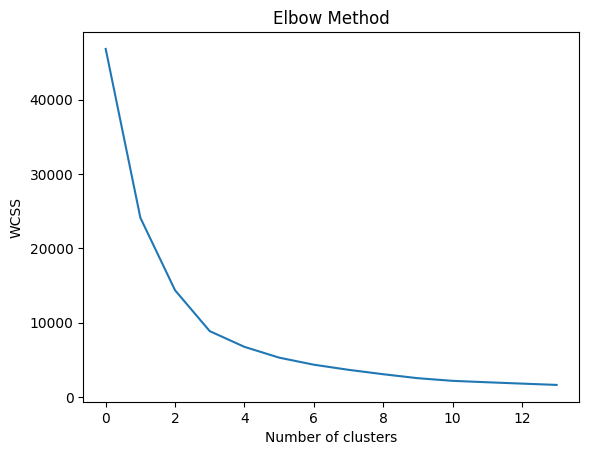

In [37]:
plt.plot(wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)

In [42]:
y_kmeans = kmeansmodel.fit_predict(coordinates_normalized)

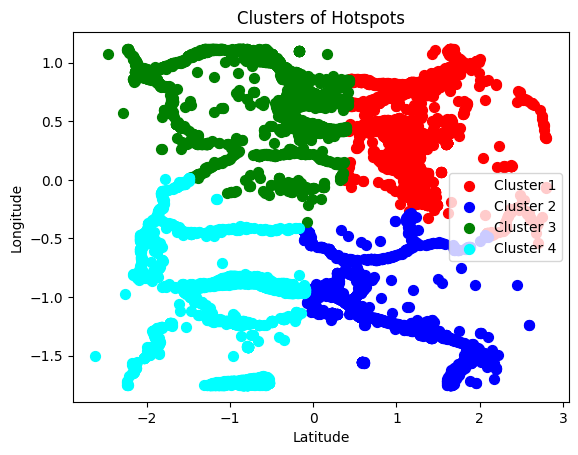

In [44]:
plt.scatter(coordinates_normalized[y_kmeans == 0, 0], coordinates_normalized[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(coordinates_normalized[y_kmeans == 1, 0], coordinates_normalized[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(coordinates_normalized[y_kmeans == 2, 0], coordinates_normalized[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(coordinates_normalized[y_kmeans == 3, 0], coordinates_normalized[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Hotspots')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()